In [1]:
# 1.2 - word count with stop words removed from text
#
# code for the Intuitive Text Mining book
# Tariq Rashid, 2018

In [2]:
# import pandas for dataframe functions
import pandas

# collections includes counter
import collections

# word cloud and plotting
import matplotlib.pyplot as plt
import wordcloud

In [3]:
# full text passage

my_text = """
The secret to good pizza is the base. And that means making the dough properly with your hands. 
Pizza dough isn’t complicated. It’s just flour, water and yeast. To make a good pizza dough, you need finely 
milled flour which has a good amount of protein, so not flour for light fluffy cakes. Mix your quick yeast 
into the flour before adding warm water. Use your hands to knead the dough, making some effort to stretch and 
fold it. Stretching dough untangles and lengthens the protein strands, making for a more elastic dough ready 
to bubble when cooked. Folding ensures a uniform mix of ingredients and also adds air into the dough. 
Keeping the dough slightly wet as a less hydrated dough can lead to a biscuit pizza and not the stretchy chewy 
Neapolitan pizza we want. After about ten minutes of kneading, the dough should be springing back from 
being gently poked. Let the dough rise until it has doubled in size, which should take a few hours. Keep 
your dough covered in a damp cloth to stop it drying out. Once it has risen, gently use your fingers to 
push down and out to form a flatter pizza shaped disk. Avoid knocking too much air out of it. Add your tomato 
passata with dried oregano and salt, and a few toppings, with small torn pieces of mozzarella cheese, and cook at 
the highest temperature you can do. Leave any olive oil and basil leaves until after you’ve cooked your 
pizza as they burn in the oven. Enjoy!
"""

In [4]:
# stop words

stop_words = ['the', 'and', 'a', 'to', 'it','of']

In [5]:
# make lowercase
my_text = my_text.lower()

# keep only normal letters and spaces, remove punctuation
cleaned_text = [char for char in my_text if char.isalpha() or char==" "]
cleaned_text = "".join(cleaned_text)

# split the text into words
word_list = cleaned_text.split()

# remove stop words
word_list = [w for w in word_list if w not in stop_words]

print("number of words = ", len(word_list) )
print(word_list)

number of words =  206
['secret', 'good', 'pizza', 'is', 'base', 'that', 'means', 'making', 'dough', 'properly', 'with', 'your', 'hands', 'pizza', 'dough', 'isnt', 'complicated', 'its', 'just', 'flour', 'water', 'yeast', 'make', 'good', 'pizza', 'dough', 'you', 'need', 'finely', 'milled', 'flour', 'which', 'has', 'good', 'amount', 'protein', 'so', 'not', 'flour', 'for', 'light', 'fluffy', 'cakes', 'mix', 'your', 'quick', 'yeast', 'into', 'flour', 'before', 'adding', 'warm', 'water', 'use', 'your', 'hands', 'knead', 'dough', 'making', 'some', 'effort', 'stretch', 'fold', 'stretching', 'dough', 'untangles', 'lengthens', 'protein', 'strands', 'making', 'for', 'more', 'elastic', 'dough', 'ready', 'bubble', 'when', 'cooked', 'folding', 'ensures', 'uniform', 'mix', 'ingredients', 'also', 'adds', 'air', 'into', 'dough', 'keeping', 'dough', 'slightly', 'wet', 'as', 'less', 'hydrated', 'dough', 'can', 'lead', 'biscuit', 'pizza', 'not', 'stretchy', 'chewy', 'neapolitan', 'pizza', 'we', 'want', '

In [6]:
# count words

# dictionary of word counts
wordcount_dict = collections.Counter(word_list)

print("unique words = ", len(wordcount_dict) )

unique words =  148


In [7]:
# pandas data frame

df = pandas.DataFrame.from_dict(wordcount_dict, orient="index", columns=['count'])

# add name to index
df.index.name = 'word'

# sort by count column, largest to smallest
df.sort_values('count', ascending=False, inplace=True)

# show top 10
df[:10]

,count
word,
dough,12
pizza,7
your,7
flour,4
has,3
in,3
out,3
with,3
making,3


(-0.5, 1199.5, 799.5, -0.5)

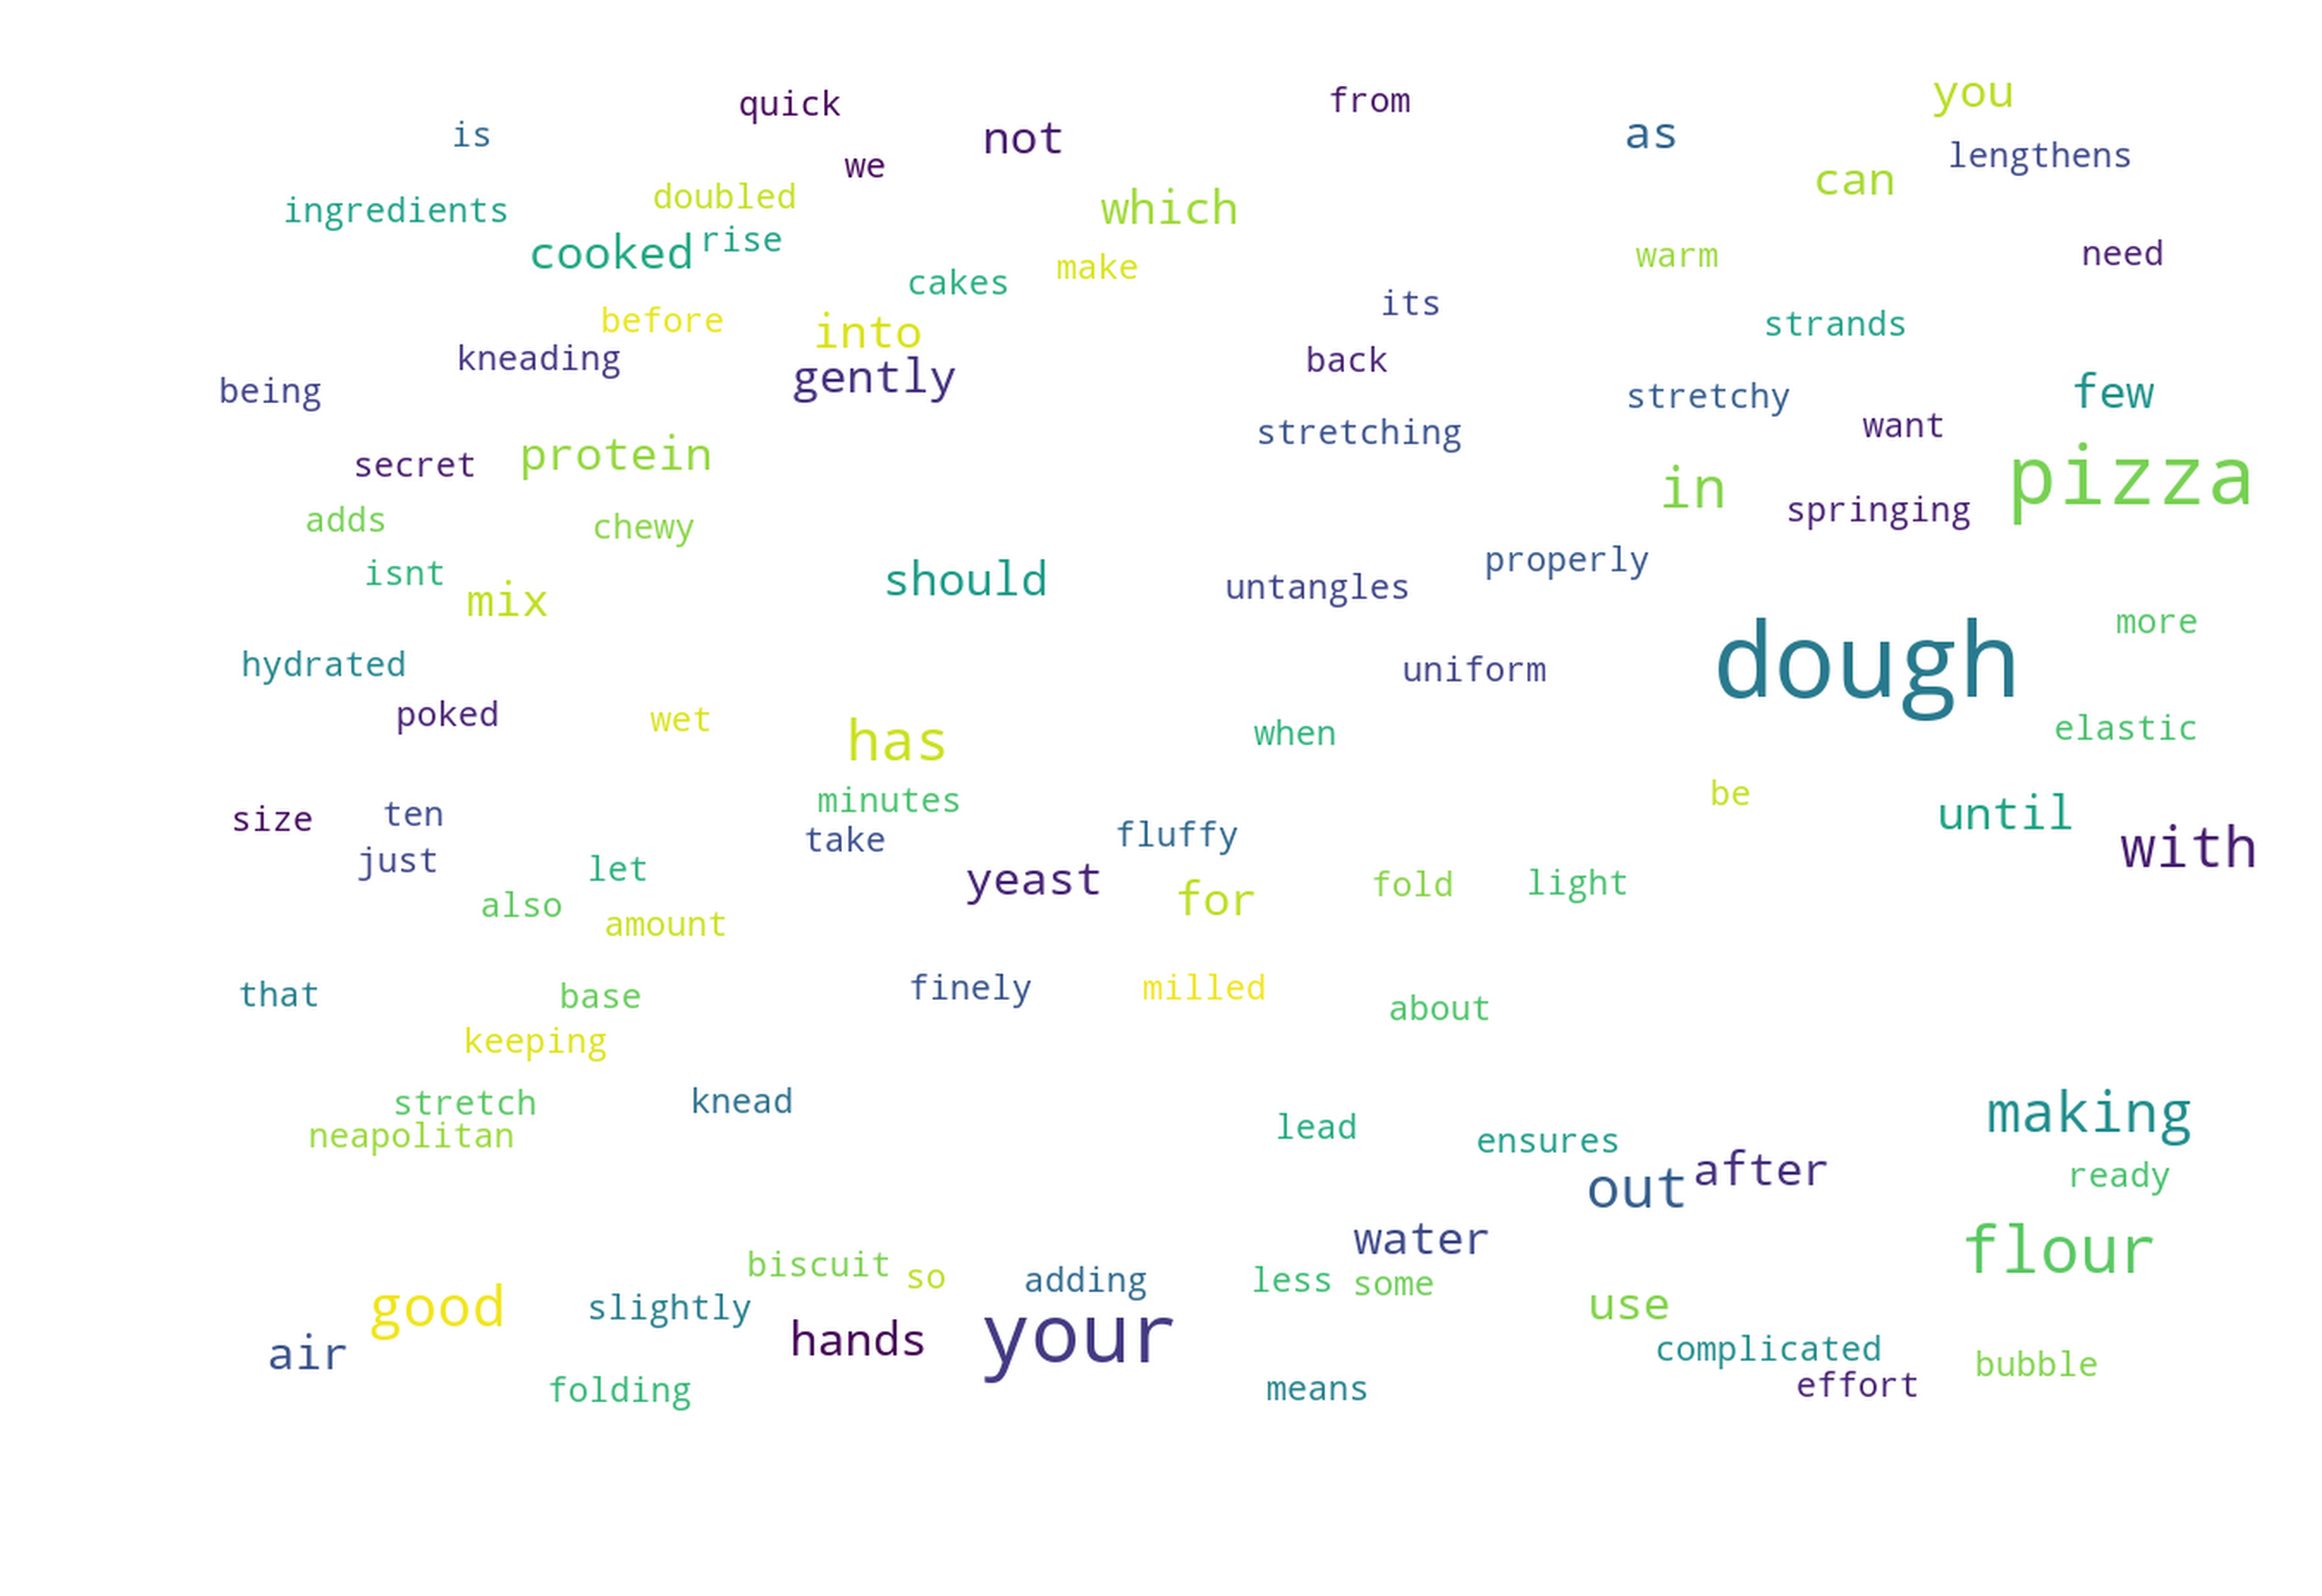

In [8]:
# word cloud

# wordcloud object
wc = wordcloud.WordCloud(colormap='viridis', max_font_size=60, max_words=100, width=1200, height=800, background_color="white", margin=10, prefer_horizontal=1.0)

# words and word count
wc.generate_from_frequencies(wordcount_dict)

# plot wordcloud
plt.figure(dpi=600, figsize=(6,4))
plt.imshow(wc, interpolation='lanczos')
plt.axis("off")